In [6]:
#boxplot_looking_for_data_files
#This code was last modified on 18/10/2024

#This code generate the boxplot by looking for the data files present in the subfolder of the code's folder 

"""
Code structure
1)Loading all the modules
2)Function for finding files inside the subfolders of the code's folder
3)Function to read lines inside a single file
4)Function thatc check if the list elemnt are all the same
4)Loading the files and preprare lists of information for the boxplot
5)Boxplot section. style, plot generation and save it into a file

"""

"\nCode structure\n1)Loading all the modules\n2)Function for finding files inside the subfolders of the code's folder\n3)Function to read lines inside a single file\n4)Function thatc check if the list elemnt are all the same\n4)Loading the files and preprare lists of information for the boxplot\n5)Boxplot section. style, plot generation and save it into a file\n\n"

In [7]:
# Importing libraries

import matplotlib.pyplot as plt
import statistics

#Module for interacting with the operating system. Needed to open read/write files
import os

#Module used for matching something against a pattern.
import fnmatch

#Module needed to get the path of the code file 
import sys

In [8]:
#Function to find files that match a partial file_name inside the subfolders of the code's folder 
def find_files_in_subfolders(partial_name, code_folder):
    files_found = []
    # Iterate over the items in the code_folder
    for entry in os.listdir(code_folder):
        entry_path = os.path.join(code_folder, entry)
        # Check if it's a directory
        if os.path.isdir(entry_path):
            # check through the subfolder
            for root, dirs, files in os.walk(entry_path):
                    # Check if the file name matches the partial name
                    for files in fnmatch.filter(files, f'*{partial_name}*'):
                        files_found.append(os.path.join(root, files))
    return files_found
#=================================================================================       



# Function to open and read a single file. Then it separates the first two rows from the rest 
def read_file_and_separate_first_row_from_others(file_path):
    try:
        with open(file_path, 'r') as file:
            # Read all lines from the file
            lines = file.readlines()
            
            # Save the first three rows and the rest into a list
            first_row = lines[0].strip() if lines else None  # First row
            second_row = lines[1].strip() if lines else None  # second row
            third_row = lines[2].strip() if lines else None  # third row
            other_rows = [float(line.strip()) for line in lines[3:]]  # Remaining rows
            
            return first_row, second_row, third_row, other_rows
        
    except FileNotFoundError:
        return "File not found.", []
    except Exception as e:
        return str(e), []
#=================================================================================          

#Function that check if all the list elemnts are the same
def all_elements_same(list):
    if not list:  # Check if the list is empty
        return True
    #all is a function that returns True if all elements are TRUE, otherwise resturns False  
    return all(element == list[0] for element in list)
#=================================================================================


In [9]:
#Loading the files from the folder dataset
# Specify the directory path starting from the folder inside the code's folder    folder/folder_in_folder

# The code folder is found using the sys module
code_folder_path = sys.path[0]
found_files = find_files_in_subfolders("boxplot_data", code_folder_path)


# Print the list of files
if found_files:
    print("Files found in code's" + code_folder_path +" subdirectories:")
    for file in found_files:
        print(file)
else:
    print("Files not found!!!")
    print(code_folder_path)


#Extract from each file label, time_averaIteration and data, and then saving them into the following lists  
runs_label=[]
runs_time_averageIteration=[]
runs_tolerance=[]
runs_data=[]

for file in found_files:
   label, time_averageIteration, tolerance, data = read_file_and_separate_first_row_from_others(file)
   
   runs_label.append(label)
   runs_time_averageIteration.append(time_averageIteration)
   runs_tolerance.append(tolerance)
   runs_data.append(data)


#just a simple sanity check
"""
print(runs_label)
print(runs_time_averageIteration)
print(runs_data)
"""

#Enter here the Hamiltonian name
hamiltonian_name = "Full AHO"

#Enter here the Hamiltonian name
hamiltonian_name_short = "AHO"

#Enter here the ground state exact energy
ref_value = -1.1669756808e-03 

#Enter here the number of bosnic modes \lambda
lambda_value = 16

#Enter here the number of VQE runs
VQE_runs = 100

#Enter here the simulation mode
Shot_or_no_Shots="No shot noise"

#"With shot noise"

#Checking if the files are from a run with the same ansatz
#if so the run_label are taken to be the tolerance labels and the plot title gets the ansatz 
if all_elements_same(runs_label):
    y_runs_label=runs_tolerance
    y_label = "tolerance"
    #generating the plot title
    plot_title = hamiltonian_name+"    "+r"$\Lambda$ ="+str(lambda_value)+"     ("+Shot_or_no_Shots+")    "+str(VQE_runs)+" VQE   "+runs_label[0]

else:
    y_runs_label=runs_label
    y_label = "Ansatzs"

    #generating the plot title
    plot_title = hamiltonian_name+"    "+r"$\Lambda$ ="+str(lambda_value)+"     ("+Shot_or_no_Shots+")    "+str(VQE_runs)+" VQE"




Files found in code'sc:\Users\ASUS\Desktop\SQM_VQE_cutoff_0\1__RESULTS_\Anharmonic_oscillator\AHO_No_Shots\AHO_bm_16_No_shots\AHO_nmb_16__RA_r1_rl subdirectories:
c:\Users\ASUS\Desktop\SQM_VQE_cutoff_0\1__RESULTS_\Anharmonic_oscillator\AHO_No_Shots\AHO_bm_16_No_shots\AHO_nmb_16__RA_r1_rl\NShots_0p1_AHO_bm_16__RUN_VQEr_100_COBYLA_maxIter_10000_tol_1e-01_RA_r1_rl\boxplot_data_tol_1e-01__RA_r1_rl_.txt
c:\Users\ASUS\Desktop\SQM_VQE_cutoff_0\1__RESULTS_\Anharmonic_oscillator\AHO_No_Shots\AHO_bm_16_No_shots\AHO_nmb_16__RA_r1_rl\NShots_0p1_AHO_bm_16__RUN_VQEr_100_COBYLA_maxIter_10000_tol_1e-02_RA_r1_rl\boxplot_data_tol_1e-02__RA_r1_rl_.txt
c:\Users\ASUS\Desktop\SQM_VQE_cutoff_0\1__RESULTS_\Anharmonic_oscillator\AHO_No_Shots\AHO_bm_16_No_shots\AHO_nmb_16__RA_r1_rl\NShots_0p1_AHO_bm_16__RUN_VQEr_100_COBYLA_maxIter_10000_tol_1e-03_RA_r1_rl\boxplot_data_tol_1e-03__RA_r1_rl_.txt
c:\Users\ASUS\Desktop\SQM_VQE_cutoff_0\1__RESULTS_\Anharmonic_oscillator\AHO_No_Shots\AHO_bm_16_No_shots\AHO_nmb_16__RA_

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14976\2936855198.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(runs_time_averageIteration)


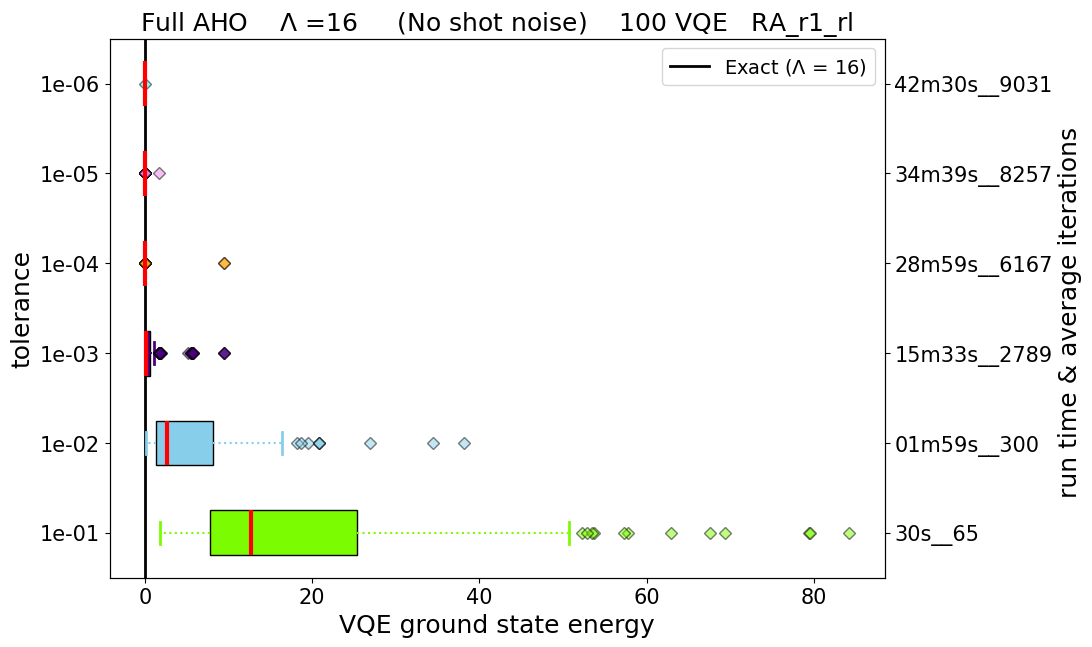

In [10]:
color_needed=len(y_runs_label)

#boxplot section
#=====================================================================================
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
#Line indicating the exact value
plt.axvline(ref_value, color='k', linewidth=2, label="Exact "+r"($\Lambda$ = "+str(lambda_value)+")")

# Creating axes instance
bp = ax.boxplot(runs_data, patch_artist = True, notch =False, vert = 0)
 

#Selection of standard colors
colors = ["lawngreen", "skyblue", "indigo", 'orange', "violet", "cyan", "darkgray", "dodgerblue","sienna", "forestgreen", "magenta", "teal", "gold" ]

#Double each color because for each box plot the two whiskers and caps are treated separately
#Example if      colors = ["lawngreen", "skyblue"]      then      whisker_cap_colors =["lawngreen", "lawngreen", "skyblue", "skyblue"]
whisker_cap_colors = [item for item in colors for var in range(2)]



#=====================================================================================
#Section for restyling the boxplot default style

for patch, color in zip(bp['boxes'], colors[0:color_needed]):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker, color in zip(bp['whiskers'], whisker_cap_colors[0:2*color_needed]):
    whisker.set(color = color,
                linewidth = 1.5,
                linestyle =":")

 
# Caps color and linewidth
for cap, color in zip(bp['caps'], whisker_cap_colors[0:2*color_needed]):
    cap.set(color = color,
            linewidth = 2)
    
 
# Median color and linewidth
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier, color in zip(bp['fliers'], colors[0:color_needed]):
    flier.set(marker ='D', color = "r", alpha = 0.5)
    flier.set_markerfacecolor(color)
     
#====================================================================================


# Section plot title and axis

fontsize = 18
fontsize_axis = 15

plt.title(plot_title, fontsize = fontsize)
plt.legend(loc="upper right", fontsize=14)


# x-axis labels and details
plt.xlabel('VQE ground state energy', fontsize = fontsize)
plt.xticks(fontsize = fontsize_axis) 
#plt.xscale('log')

# ticks
ax.get_xaxis().tick_bottom()

#plt.xticks(np.arange(min(ref_value, min(vqe_eigenvalues)),  max(vqe_eigenvalues)))
#plt.xticks(list(plt.xticks()[0])+[ref_value])
#ax.set_xlim([1e-20, 1e-1])



# y-axis  LEFT labels and details
ax.set_yticklabels(y_runs_label)
ax.set_ylabel(y_label, fontsize = fontsize)

# ticks
ax.get_yaxis().tick_left()
plt.yticks(fontsize = fontsize_axis) 


# y-axis  RIGHT labels and details
ax2 = ax.twinx() #duplicating the right y axis
ax2.set_ylim(ax.get_ylim())
ax2.set_ylabel("run time & average iterations ", fontsize = fontsize)
ax2.set_yticklabels(runs_time_averageIteration)
ax2.set_yticks(ax.get_yticks())
plt.yticks(fontsize = fontsize_axis) 


# save plot into a file
plt.savefig("bp_"+hamiltonian_name_short+"_nbm_"+str(lambda_value)+"_NoShots_tol_.png", bbox_inches='tight', format='png')

plt.show()